In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
import io
 
trainDf = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
uploaded = files.upload()
 
testDf = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv


In [7]:
trainDf.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [9]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

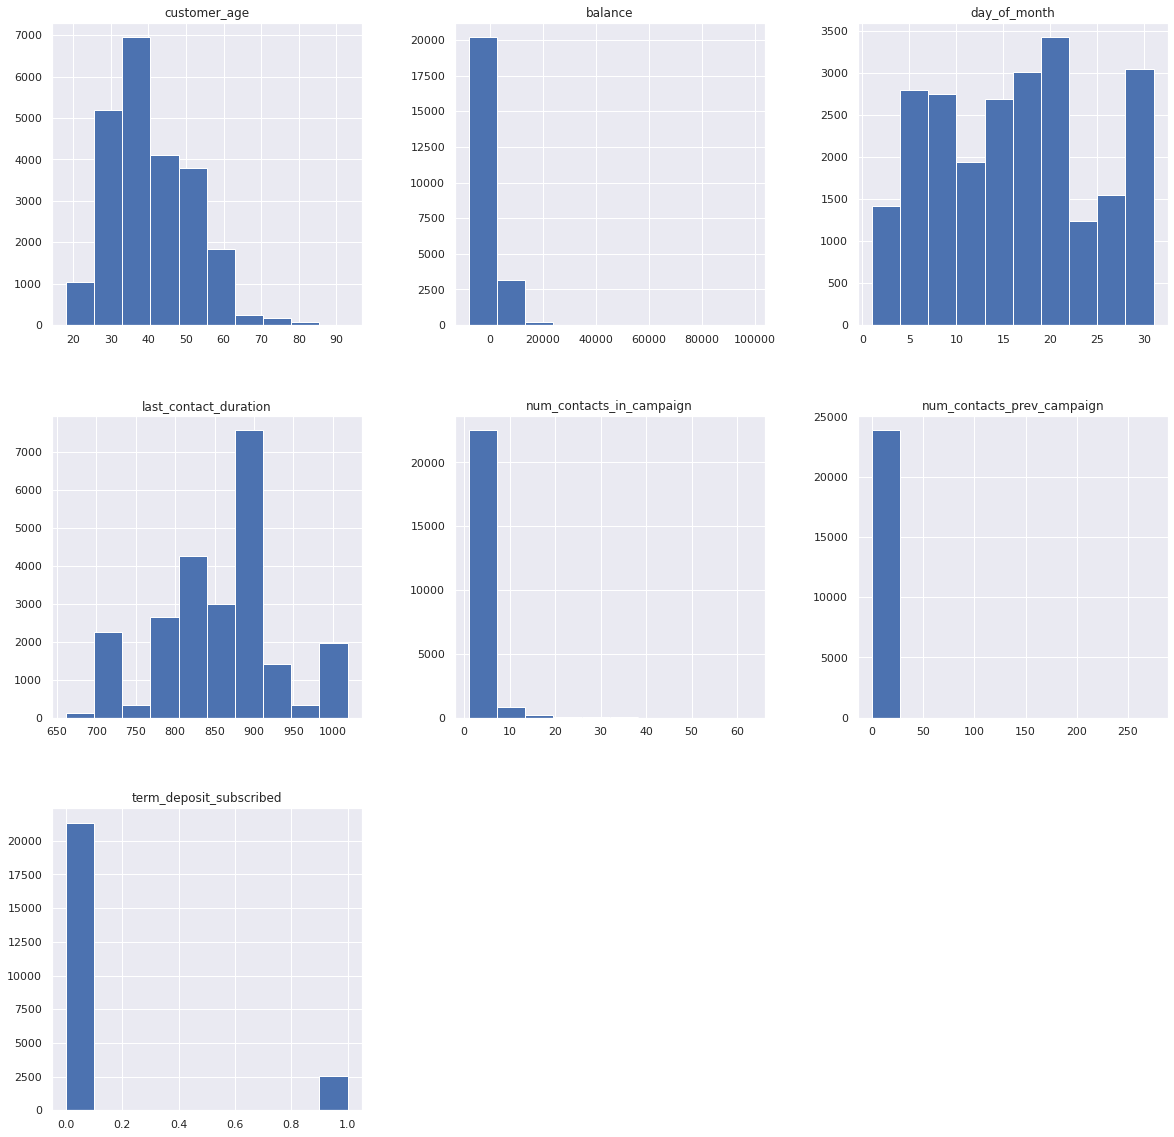

In [11]:
p = trainDf.hist(figsize = (20,20))


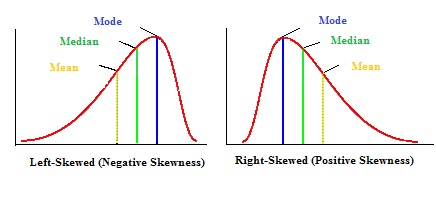

In [12]:
trainDf['customer_age'].fillna(trainDf['customer_age'].median(), inplace = True)
trainDf['balance'].fillna(trainDf['balance'].median(), inplace = True)
trainDf['num_contacts_in_campaign'].fillna(trainDf['num_contacts_in_campaign'].median(), inplace = True)

In [28]:
marital = {}
personal_loan = {}
a = trainDf['marital'].values
b = trainDf['personal_loan'].values
for r in a:
    try:
        marital[r] += 1
    except:
        marital[r] = 1
for r in b:
    try:
        personal_loan[r] += 1
    except:
        personal_loan[r] = 1

print(marital)
print(personal_loan)

{'married': 14271, 'single': 6707, 'divorced': 2795, nan: 107}
{'yes': 3766, 'no': 20001, nan: 113}


In [34]:
trainDf['marital'].fillna('married', inplace = True)
trainDf['personal_loan'].fillna('no', inplace = True)

In [35]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23880 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23880 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23880 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23880 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    238

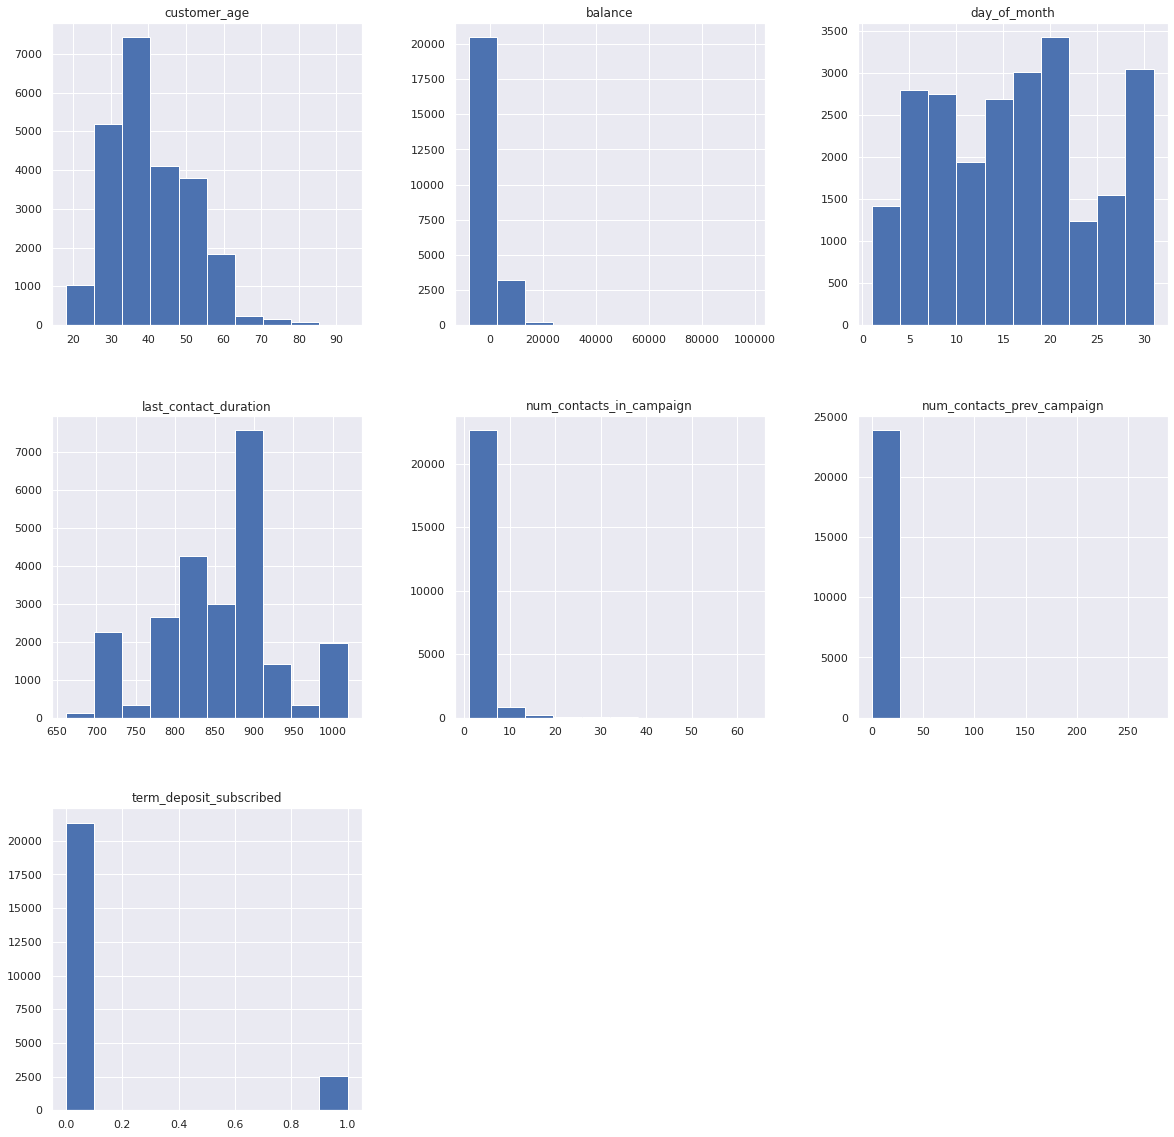

In [36]:
p = trainDf.hist(figsize = (20,20))

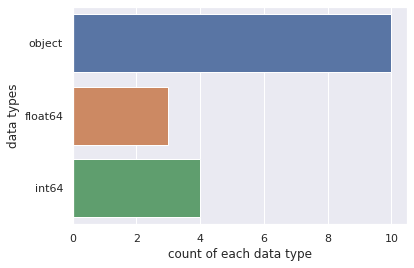

In [37]:
sns.countplot(y=trainDf.dtypes ,data=trainDf)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

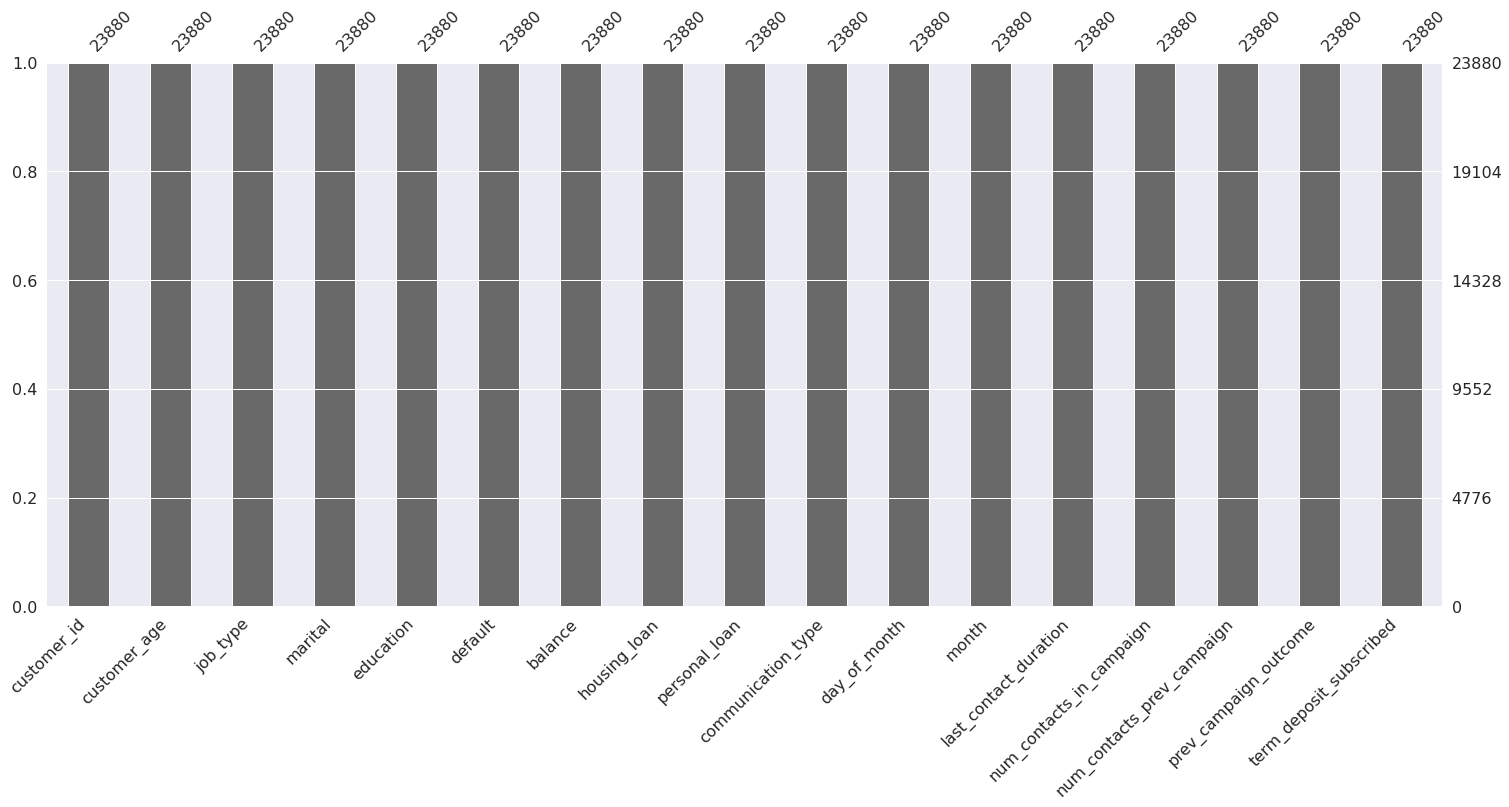

In [38]:
import missingno as msno
p=msno.bar(trainDf)

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64


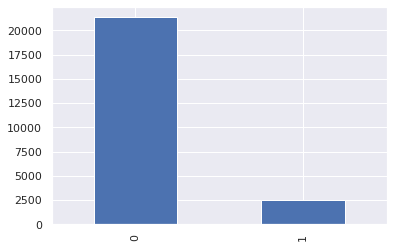

In [48]:
print(trainDf.term_deposit_subscribed.value_counts())
p=trainDf.term_deposit_subscribed.value_counts().plot(kind="bar")

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
columns = ['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome']
trainCopy = trainDf.copy(deep=True)
le = LabelEncoder()
for c in columns:
    trainCopy[c] = le.fit_transform(trainCopy[c])


In [59]:
trainCopy.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,1,1,1,0,934.0,0,1,0,18,9,704,2.0,1,1,0
1,id_40992,41.0,1,1,0,0,1352.0,1,0,0,13,8,893,2.0,0,3,0
2,id_41178,57.0,1,1,0,0,495.0,0,0,0,18,1,796,4.0,0,3,1
3,id_35102,37.0,4,1,2,0,650.0,1,0,2,26,8,880,1.0,0,3,0
4,id_34750,29.0,9,1,1,0,265.0,1,0,0,19,1,795,2.0,0,3,0


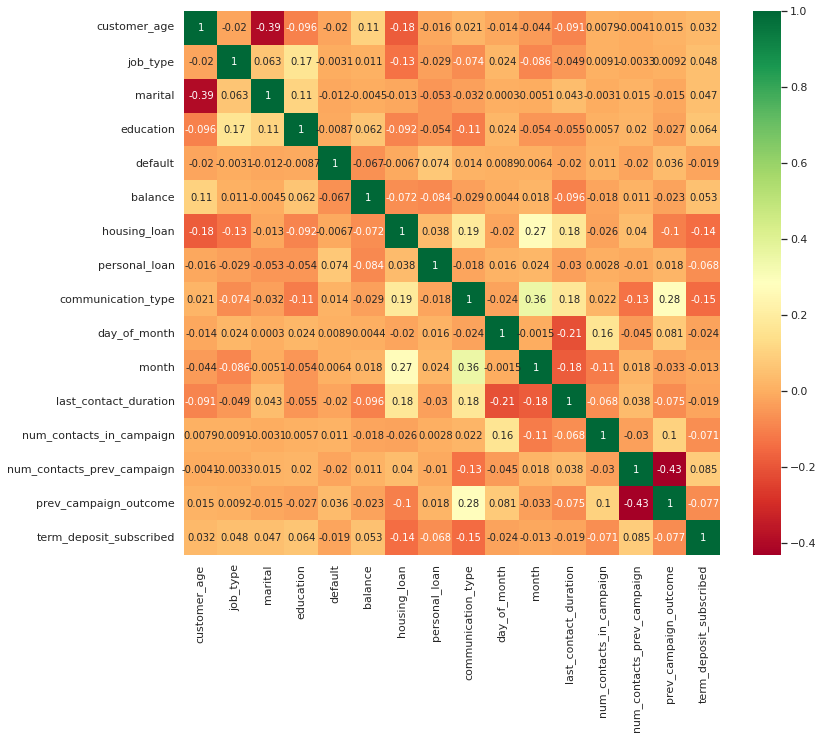

In [60]:
plt.figure(figsize=(12,10))
p=sns.heatmap(trainCopy.corr(), annot=True,cmap ='RdYlGn')

In [62]:
cor_table = trainCopy.corr()[['term_deposit_subscribed']]
cor_table.sort_values(by='term_deposit_subscribed',inplace=True)

In [63]:
cor_table

,term_deposit_subscribed
communication_type,-0.147065
housing_loan,-0.141493
prev_campaign_outcome,-0.076584
num_contacts_in_campaign,-0.071047
personal_loan,-0.068225
day_of_month,-0.024477
last_contact_duration,-0.019215
default,-0.018905
month,-0.012772
customer_age,0.031907


In [67]:
trainCopy.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [68]:
input_columns = ['customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome']
output_column = ['term_deposit_subscribed']

In [69]:
X = trainCopy[input_columns]
Y = trainCopy[output_column]
print(X.shape,Y.shape)

(23880, 15) (23880, 1)


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
from sklearn.model_selection import cross_val_score
depth = []
for i in range(5,20):
    clf = DecisionTreeClassifier(max_depth=i) #uses gini index for building tree
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=Y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))

print(depth)

[(5, 0.9038944265012743), (6, 0.904606359644762), (7, 0.9029313773534852), (8, 0.9015494905725568), (9, 0.8997905738186045), (10, 0.8971522968853515), (11, 0.8944305396536695), (12, 0.8920434278235552), (13, 0.8900333582411736), (14, 0.8869346815088524), (15, 0.8840870716819953), (16, 0.8796899639177553), (17, 0.8769683294331673), (18, 0.8731992939979961), (19, 0.8688442393880595)]


In [73]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
tree.fit(X,Y)


DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [74]:
tree.score(X,Y)

0.9016750418760469

In [75]:
testDf.shape

(7767, 16)

In [76]:
columns = ['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome']
testCopy = testDf.copy(deep=True)
le = LabelEncoder()
for c in columns:
    testCopy[c] = le.fit_transform(testCopy[c])


In [79]:
testCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   object 
 1   customer_age                7625 non-null   float64
 2   job_type                    7767 non-null   int64  
 3   marital                     7767 non-null   int64  
 4   education                   7767 non-null   int64  
 5   default                     7767 non-null   int64  
 6   balance                     7645 non-null   float64
 7   housing_loan                7767 non-null   int64  
 8   personal_loan               7767 non-null   int64  
 9   communication_type          7767 non-null   int64  
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   int64  
 13  num_contacts_in_campaign    7751 

In [80]:
testCopy['customer_age'].fillna(testCopy['customer_age'].median(), inplace = True)
testCopy['balance'].fillna(testCopy['balance'].median(), inplace = True)
testCopy['num_contacts_in_campaign'].fillna(testCopy['num_contacts_in_campaign'].median(), inplace = True)

In [81]:
X_Test = testCopy[input_columns]
print(X_Test.shape)

(7767, 15)


In [82]:
Y_test_prob = tree.predict_proba(X_Test)

In [83]:
Y_test_prob

array([[0.91871456, 0.08128544],
       [0.90272374, 0.09727626],
       [0.96807682, 0.03192318],
       ...,
       [0.93606627, 0.06393373],
       [0.91871456, 0.08128544],
       [0.90272374, 0.09727626]])

In [84]:
term_deposit_subscribed_probability = Y_test_prob[:,1]

In [88]:
ids = testCopy['customer_id'].values

In [89]:
print(ids.shape,term_deposit_subscribed_probability.shape)

(7767,) (7767,)


In [93]:
ids = ids.reshape((-1,1))
term_deposit_subscribed_probability = term_deposit_subscribed_probability.reshape((-1,1))

In [94]:
result_array = np.concatenate((ids,term_deposit_subscribed_probability),axis=1)

In [95]:
result_array

array([['id_43823', 0.08128544423440454],
       ['id_10523', 0.09727626459143969],
       ['id_43951', 0.0319231767453932],
       ...,
       ['id_16678', 0.06393372982158028],
       ['id_26369', 0.08128544423440454],
       ['id_31483', 0.09727626459143969]], dtype=object)

In [96]:
resultDf = pd.DataFrame(result_array,columns=['customer_id','probability'])

In [97]:
resultDf.head()

,customer_id,probability
0,id_43823,0.081285
1,id_10523,0.097276
2,id_43951,0.031923
3,id_12681,0.453671
4,id_2153,0.240437


In [103]:
sortedResults = resultDf.sort_values(by='probability',ascending=False)

In [106]:
top1000 = sortedResults.head(1000)

In [108]:
top1000 = top1000.drop(columns = ['probability'])

In [111]:
top1000.to_csv('results.csv',index=False)


In [112]:
from google.colab import files

files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>